# ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

[Te proporcionamos algunos comentarios para orientarte mientras completas este proyecto. Pero debes asegurarte de eliminar todos los comentarios entre corchetes antes de entregar tu proyecto.]

[Antes de sumergirte en el análisis de datos, explica por tu propia cuenta el propósito del proyecto y las acciones que planeas realizar.]

[Ten en cuenta que estudiar, modificar y analizar datos es un proceso iterativo. Es normal volver a los pasos anteriores y corregirlos/ampliarlos para permitir nuevos pasos.]

## Inicialización

In [1]:
# Cargar todas las librerías
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np 
from scipy import stats as st
import math
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns


## Cargar datos

In [2]:
# Carga los archivos de datos en diferentes DataFrames

df_calls = pd.read_csv('./megaline_calls.csv')
df_internet= pd.read_csv('./megaline_internet.csv')
df_messages= pd.read_csv('./megaline_messages.csv')
df_plans= pd.read_csv('./megaline_plans.csv')
df_users= pd.read_csv('./megaline_users.csv')

## Preparar los datos

[Los datos para este proyecto se dividen en varias tablas. Explora cada una para tener una comprensión inicial de los datos. Si es necesario, haz las correcciones requeridas en cada tabla.]

## Tarifas

In [3]:
# Imprime la información general/resumida sobre el DataFrame de las tarifas
df_plans.info()
df_plans.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 260.0+ bytes


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
count,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000
mean,525.000000,23040.000000,1750.000000,45.000000,8.50000,0.020000,0.020000
std,671.751442,10861.160159,1767.766953,35.355339,2.12132,0.014142,0.014142
min,50.000000,15360.000000,500.000000,20.000000,7.00000,0.010000,0.010000
25%,287.500000,19200.000000,1125.000000,32.500000,7.75000,0.015000,0.015000
50%,525.000000,23040.000000,1750.000000,45.000000,8.50000,0.020000,0.020000
75%,762.500000,26880.000000,2375.000000,57.500000,9.25000,0.025000,0.025000
max,1000.000000,30720.000000,3000.000000,70.000000,10.00000,0.030000,0.030000


In [4]:
# Imprime una muestra de los datos para las tarifas
df_plans

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

Se observan que no hay datos nulos y que el tipo de datos es int 64 a excepción de usd_per_message y usd_per_minute, en este caso es porque es el costo definido del plan y no puede ser un entero. 

## Corregir datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [5]:
duplicated=df_plans.duplicated().sum()
duplicated
#No hay valores duplicados ni ausentes 

np.int64(0)

## Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [6]:
#No hay valores que considere útiles en este caso que se puedan agregar. 

## Usuarios/as

In [7]:
# Imprime la información general/resumida sobre el DataFrame de usuarios
df_users.info()
df_users.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


,user_id,age
count,500.000000,500.000000
mean,1249.500000,45.486000
std,144.481833,16.972269
min,1000.000000,18.000000
25%,1124.750000,30.000000
50%,1249.500000,46.000000
75%,1374.250000,61.000000
max,1499.000000,75.000000


In [8]:
# Imprime una muestra de datos para usuarios
df_users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

Se observa que churn_date es la única columna que tiene valores nulos y que son 466, esto da a entender que muy pocos usuarios se han dado de baja hasta el momento. Por el momendo decido no rellenar estos valores porque si están vacíos es porque siguen activos hasta el momento.

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [9]:
df_users.duplicated().sum()
df_users['plan'].unique()
df_users['reg_date']=pd.to_datetime(df_users['reg_date'])
df_users['churn_date']=pd.to_datetime(df_users['churn_date'])
df_users

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaT
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaT
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaT
...,...,...,...,...,...,...,...,...
495,1495,Fidel,Sharpe,67,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-09-04,surf,NaT
496,1496,Ariel,Shepherd,49,"New Orleans-Metairie, LA MSA",2018-02-20,surf,NaT
497,1497,Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-10,ultimate,NaT
498,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,NaT


### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [10]:
#Se agrega la columna region con las siglas correspondientes a cada cuidad.
df_users['region'] = df_users['city'].str.extract(r',\s*([A-Z]{2}-[A-Z]{2})')
df_users

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,region
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaT,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaT,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaT,NaN
...,...,...,...,...,...,...,...,...,...
495,1495,Fidel,Sharpe,67,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-09-04,surf,NaT,NY-NJ
496,1496,Ariel,Shepherd,49,"New Orleans-Metairie, LA MSA",2018-02-20,surf,NaT,NaN
497,1497,Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-10,ultimate,NaT,NaN
498,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,NaT,NY-NJ


## Llamadas

In [11]:
# Imprime la información general/resumida sobre el DataFrame de las llamadas
df_calls.info()
df_calls.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


,user_id,duration
count,137735.000000,137735.000000
mean,1247.658046,6.745927
std,139.416268,5.839241
min,1000.000000,0.000000
25%,1128.000000,1.290000
50%,1247.000000,5.980000
75%,1365.000000,10.690000
max,1499.000000,37.600000


In [12]:
# Imprime una muestra de datos para las llamadas
df_calls.head()

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

No hay valores nulos en el dataframe y en este caso sólo hay que cambiar el tipo de datos de la fecha a to_datetime. De igual forma al ser la duración fraccionaria, se va a agregar una columna en la que se redondeen a un número entero que se pueda cobrar en la tarifa. 

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [13]:
df_calls.duplicated().sum()
df_calls['call_date']=pd.to_datetime(df_calls['call_date'])
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB


### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [14]:
#creación de una columna con la duración cobrable.
df_calls['duration_to_pay'] = df_calls['duration'].apply(math.ceil)
df_calls.head()

,id,user_id,call_date,duration,duration_to_pay
0,1000_93,1000,2018-12-27,8.52,9
1,1000_145,1000,2018-12-27,13.66,14
2,1000_247,1000,2018-12-27,14.48,15
3,1000_309,1000,2018-12-28,5.76,6
4,1000_380,1000,2018-12-30,4.22,5


## Mensajes

In [15]:
# Imprime la información general/resumida sobre el DataFrame de los mensajes
df_messages.info()
df_messages.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


,user_id
count,76051.000000
mean,1245.972768
std,139.843635
min,1000.000000
25%,1123.000000
50%,1251.000000
75%,1362.000000
max,1497.000000


In [16]:
# Imprime una muestra de datos para los mensajes

df_messages.head()

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

En este caso al igual que en el dataframe corespondiente a llamadas, se cambiará el tipo de dato de la fecha a to_datetime. No se observan valores nulos. 

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [17]:
df_messages.duplicated().sum()
df_messages['message_date']=pd.to_datetime(df_messages['message_date'])
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB


### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [18]:
#Los datos se observan completos. 

## Internet

In [19]:
# Imprime la información general/resumida sobre el DataFrame de internet
df_internet.info()
df_internet.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


,user_id,mb_used
count,104825.000000,104825.000000
mean,1242.496361,366.713701
std,142.053913,277.170542
min,1000.000000,0.000000
25%,1122.000000,136.080000
50%,1236.000000,343.980000
75%,1367.000000,554.610000
max,1499.000000,1693.470000


In [20]:
# Imprime una muestra de datos para el tráfico de internet
df_internet.head()

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

En este caso no se observan valores nulos, se cambiará session_date a to_datetime, se observa que en al igual que en las llamadas los mb se tienen que cambiar a gb y también tiene que ser un entero, en este caso no se cambiará en este paso para no perder información en caso de requerirla. Se hará el cambio hasta saber que no se requiere hacer un análisis con los mb usados.

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [21]:
df_internet.duplicated().sum()
df_internet['session_date']=pd.to_datetime(df_internet['session_date'])
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB


### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [22]:
#Los mb se tienen que cambiar a gb y también tiene que ser un entero, 
#en este caso no se cambiará en este paso para no perder información en caso de requerirla. 
#Se hará el cambio hasta saber que no se requiere hacer un análisis con los mb usados.

## Estudiar las condiciones de las tarifas

[Es sumamente importante entender cómo funcionan las tarifas, cómo se les cobra a los usuarios en función de su plan de suscripción. Así que te sugerimos imprimir la información de la tarifa para ver una vez más sus condiciones.]

In [23]:
# Imprime las condiciones de la tarifa y asegúrate de que te quedan claras
df_plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


## Agregar datos por usuario

[Ahora que los datos están limpios, agrega los datos por usuario y por periodo para que solo haya un registro por usuario y por periodo. Esto facilitará mucho el análisis posterior.]

In [24]:
# Calcula el número de llamadas hechas por cada usuario al mes. Guarda el resultado.
df_calls['month'] = df_calls['call_date'].dt.month
calls_per_month=df_calls.groupby(['user_id', 'month'])['id'].count().reset_index().rename(columns={'id':'total_calls'})
calls_per_month

,user_id,month,total_calls
0,1000,12,16
1,1001,8,27
2,1001,9,49
3,1001,10,65
4,1001,11,64
...,...,...,...
2253,1498,12,39
2254,1499,9,41
2255,1499,10,53
2256,1499,11,45


In [25]:
# Calcula la cantidad de minutos usados por cada usuario al mes. Guarda el resultado.
minutes_per_month=df_calls.groupby(['user_id', 'month'])['duration_to_pay'].sum().reset_index()
minutes_per_month

,user_id,month,duration_to_pay
0,1000,12,124
1,1001,8,182
2,1001,9,315
3,1001,10,393
4,1001,11,426
...,...,...,...
2253,1498,12,339
2254,1499,9,346
2255,1499,10,385
2256,1499,11,308


In [26]:
# Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.
#df_messages['month'] = df_messages['message_date'].dt.to_period('M')
df_messages['month'] = df_messages['message_date'].dt.month
messages_per_month=df_messages.groupby(['user_id', 'month'])['id'].count().reset_index().rename(columns={'id':'total_messages'})
messages_per_month

,user_id,month,total_messages
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36
...,...,...,...
1801,1496,9,21
1802,1496,10,18
1803,1496,11,13
1804,1496,12,11


In [27]:
# Calcula el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.
# se realiza el redondeo de mb a gb
def redondeo_gb(mb):
    gb=np.ceil(mb/1024)
    return gb
df_internet['gb_to_pay']=df_internet['mb_used'].apply(redondeo_gb)
df_internet.head()

df_internet['month'] = df_internet['session_date'].dt.month

internet_per_month=df_internet.groupby(['user_id', 'month'])['gb_to_pay'].sum().reset_index()
internet_per_month

,user_id,month,gb_to_pay
0,1000,12,4.0
1,1001,8,21.0
2,1001,9,41.0
3,1001,10,50.0
4,1001,11,49.0
...,...,...,...
2272,1498,12,56.0
2273,1499,9,37.0
2274,1499,10,52.0
2275,1499,11,43.0


[Junta los datos agregados en un DataFrame para que haya un registro que represente lo que consumió un usuario único en un mes determinado.]

In [28]:
# Fusiona los datos de llamadas, minutos, mensajes e Internet con base en user_id y month
df_merged=calls_per_month.merge(minutes_per_month, on=['user_id', 'month'], how='outer')
df_merged=df_merged.merge(messages_per_month, left_on=['user_id', 'month'], right_on=['user_id', 'month'], how='outer')
df_merged=df_merged.merge(internet_per_month, left_on=['user_id', 'month'], right_on=['user_id', 'month'], how='outer')
df_merged

,user_id,month,total_calls,duration_to_pay,total_messages,gb_to_pay
0,1000,12,16.0,124.0,11.0,4.0
1,1001,8,27.0,182.0,30.0,21.0
2,1001,9,49.0,315.0,44.0,41.0
3,1001,10,65.0,393.0,53.0,50.0
4,1001,11,64.0,426.0,36.0,49.0
...,...,...,...,...,...,...
2288,1498,12,39.0,339.0,NaN,56.0
2289,1499,9,41.0,346.0,NaN,37.0
2290,1499,10,53.0,385.0,NaN,52.0
2291,1499,11,45.0,308.0,NaN,43.0


In [29]:
# Añade la información de la tarifa
users_merged=df_users.merge(df_merged, on=['user_id'])
final_merged=users_merged.merge(df_plans, left_on='plan', right_on='plan_name').drop(columns='plan_name')
final_merged.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,region,month,...,duration_to_pay,total_messages,gb_to_pay,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,NaN,12,...,124.0,11.0,4.0,1000,30720,3000,70,7,0.01,0.01
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,NaN,8,...,182.0,30.0,21.0,50,15360,500,20,10,0.03,0.03
2,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,NaN,9,...,315.0,44.0,41.0,50,15360,500,20,10,0.03,0.03
3,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,NaN,10,...,393.0,53.0,50.0,50,15360,500,20,10,0.03,0.03
4,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,NaN,11,...,426.0,36.0,49.0,50,15360,500,20,10,0.03,0.03


[Calcula los ingresos mensuales por usuario (resta el límite del paquete gratuito del número total de llamadas, mensajes de texto y datos; multiplica el resultado por el valor del plan de llamadas; añade la tarifa mensual en función del plan de llamadas). Nota: Dadas las condiciones del plan, ¡esto podría no ser tan trivial como un par de líneas! Así que no pasa nada si dedicas algo de tiempo a ello.]

In [30]:
#Limpiamos la tabla con los datos a trabajar
final_table=final_merged[['usd_monthly_pay','user_id','month','duration_to_pay','total_calls','total_messages','gb_to_pay','plan','city','region']]
final_table.head()

,usd_monthly_pay,user_id,month,duration_to_pay,total_calls,total_messages,gb_to_pay,plan,city,region
0,70,1000,12,124.0,16.0,11.0,4.0,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA",NaN
1,20,1001,8,182.0,27.0,30.0,21.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",NaN
2,20,1001,9,315.0,49.0,44.0,41.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",NaN
3,20,1001,10,393.0,65.0,53.0,50.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",NaN
4,20,1001,11,426.0,64.0,36.0,49.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",NaN


In [31]:
# Calcula el ingreso mensual para cada usuario
# Columna de llamadas extras a cobrar 
def llamadas_to_pay(row):
    plan=row['plan']
    used_minutes=row['duration_to_pay']
    
    if plan=='surf':
        if used_minutes>500:
            chargeable=used_minutes-500
        else: 
            chargeable=0
    if plan=='ultimate':
        if used_minutes>3000:
            chargeable=used_minutes-3000
        else: 
            chargeable=0
    return chargeable

final_table['extra_calls']=final_table.apply(llamadas_to_pay, axis=1)

# Columna de mensajes extras a cobrar 
def mensajes_to_pay(row):
    plan=row['plan']
    used_messages=row['total_messages']
    
    if plan=='surf':
        if used_messages>50:
            chargeable=used_messages-50
        else: 
            chargeable=0
    if plan=='ultimate':
        if used_messages>1000:
            chargeable=used_messages-1000
        else: 
            chargeable=0
    return chargeable

final_table['extra_messagess']=final_table.apply(mensajes_to_pay, axis=1)

# Columna de GB extras a cobrar 
def gb_pay(row):
    plan=row['plan']
    used_gb=row['gb_to_pay']
    
    if plan=='surf':
        if used_gb>15:
            chargeable=used_gb-15
        else: 
            chargeable=0
    if plan=='ultimate':
        if used_gb>30:
            chargeable=used_gb-30
        else: 
            chargeable=0
    return chargeable

final_table['extra_gb']=final_table.apply(gb_pay, axis=1)


# Calculo del ingreso mensual para cada usuario y adición de la columna
def income(row):
    plan=row['plan']
    extra_calls=row['extra_calls']
    extra_messages=row['extra_messagess']
    extra_gb=row['extra_gb']
    usd_normal=row['usd_monthly_pay']
    
    cargo_surf_minutes=0.3
    cargo_surf_messages=0.3
    cargo_surf_gb=10
    
    cargo_ultimate_minutes=0.1
    cargo_ultimate_messages=0.1
    cargo_ultimate_gb=7
    
    if plan=='surf':
        ingreso=usd_normal+((extra_calls*cargo_surf_minutes)+(extra_messages*cargo_surf_messages)+(extra_gb*cargo_surf_gb))
    else:
        ingreso=usd_normal+((extra_calls*cargo_ultimate_minutes)+(extra_messages*cargo_ultimate_messages)+(extra_gb*cargo_ultimate_gb))
    return ingreso  

final_table['income']=final_table.apply(income, axis=1)
final_table.head()

,usd_monthly_pay,user_id,month,duration_to_pay,total_calls,total_messages,gb_to_pay,plan,city,region,extra_calls,extra_messagess,extra_gb,income
0,70,1000,12,124.0,16.0,11.0,4.0,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA",NaN,0.0,0.0,0.0,70.0
1,20,1001,8,182.0,27.0,30.0,21.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",NaN,0.0,0.0,6.0,80.0
2,20,1001,9,315.0,49.0,44.0,41.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",NaN,0.0,0.0,26.0,280.0
3,20,1001,10,393.0,65.0,53.0,50.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",NaN,0.0,3.0,35.0,370.9
4,20,1001,11,426.0,64.0,36.0,49.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",NaN,0.0,0.0,34.0,360.0


## Estudia el comportamiento de usuario

[Calcula algunas estadísticas descriptivas para los datos agregados y fusionados que nos sean útiles y que muestren un panorama general captado por los datos. Dibuja gráficos útiles para facilitar la comprensión. Dado que la tarea principal es comparar las tarifas y decidir cuál es más rentable, las estadísticas y gráficas deben calcularse por tarifa.]

[En los comentarios hallarás pistas relevantes para las llamadas, pero no las hay para los mensajes e Internet. Sin embargo, el principio del estudio estadístico que se aplica para ellos es el mismo que para las llamadas.]

### Llamadas

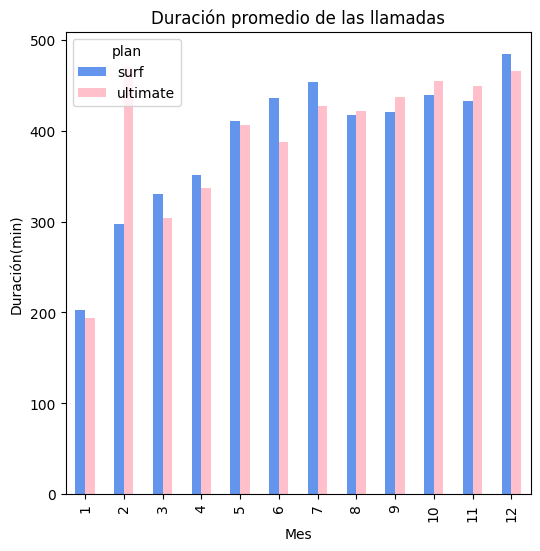

In [32]:
# Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.

average_duration=final_table.groupby(['month', 'plan'])['duration_to_pay'].mean().unstack()
average_duration.rename(columns={'duration_to_pay':'avg_duration'})


average_duration.plot(
        kind='bar', 
        title='Duración promedio de las llamadas',
        figsize=[6, 6],
        color=['cornflowerblue','pink'],
        xlabel='Mes',
        ylabel='Duración(min)',
       )

plt.show()

[Se observa que en el plan surf se realizan más llamadas en 7 de 12 meses a comparacion que ultimate y que el en plan ultimate en el mes de febrero es cuando se realizan más llamadas. Se observa que ambos planes tienen un comportamiento parecido durante todo el año a excepción del mes de febrero]

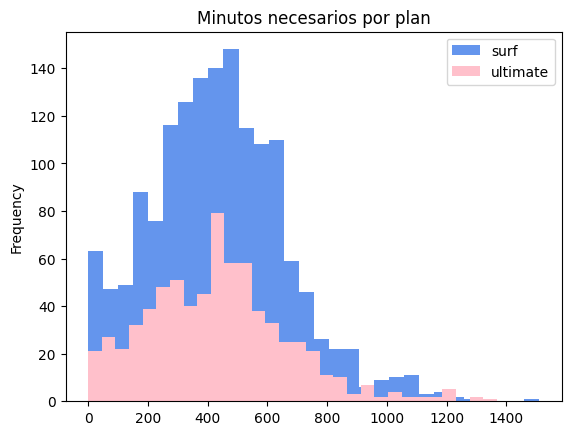

In [33]:
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.

final_table[final_table['plan']=='surf']['duration_to_pay'].plot(  
        kind='hist',
        title='Minutos necesarios por plan',
        color='cornflowerblue',
        bins=30,
        label='surf'
       )
final_table[final_table['plan']=='ultimate']['duration_to_pay'].plot(  
        kind='hist',
        title='Minutos necesarios por plan',
        color='pink',
        bins=30,
        label='ultimate'
       )
plt.legend()
plt.show()

[Se observa que surf requiere más minutos a diferencia de ultimate.Surf requiere más del doble de minutos que ultimate.]

[Calcula la media y la variable de la duración de las llamadas para averiguar si los usuarios de los distintos planes se comportan de forma diferente al realizar sus llamadas.]

In [34]:
# Calcula la media y la varianza de la duración mensual de llamadas.
mean=final_table.groupby('month')['duration_to_pay'].mean()
var=final_table.groupby('month')['duration_to_pay'].var()

calculo=pd.DataFrame({'mean':mean, 'var':var})
calculo

,mean,var
month,,
1,196.666667,13135.866667
2,366.333333,56978.380952
3,321.171429,43378.499160
4,347.197183,45620.531992
5,409.125000,52828.673544
6,420.361702,42344.746809
7,444.944134,63782.244052
8,418.956522,52363.369280
9,425.942238,48325.605347


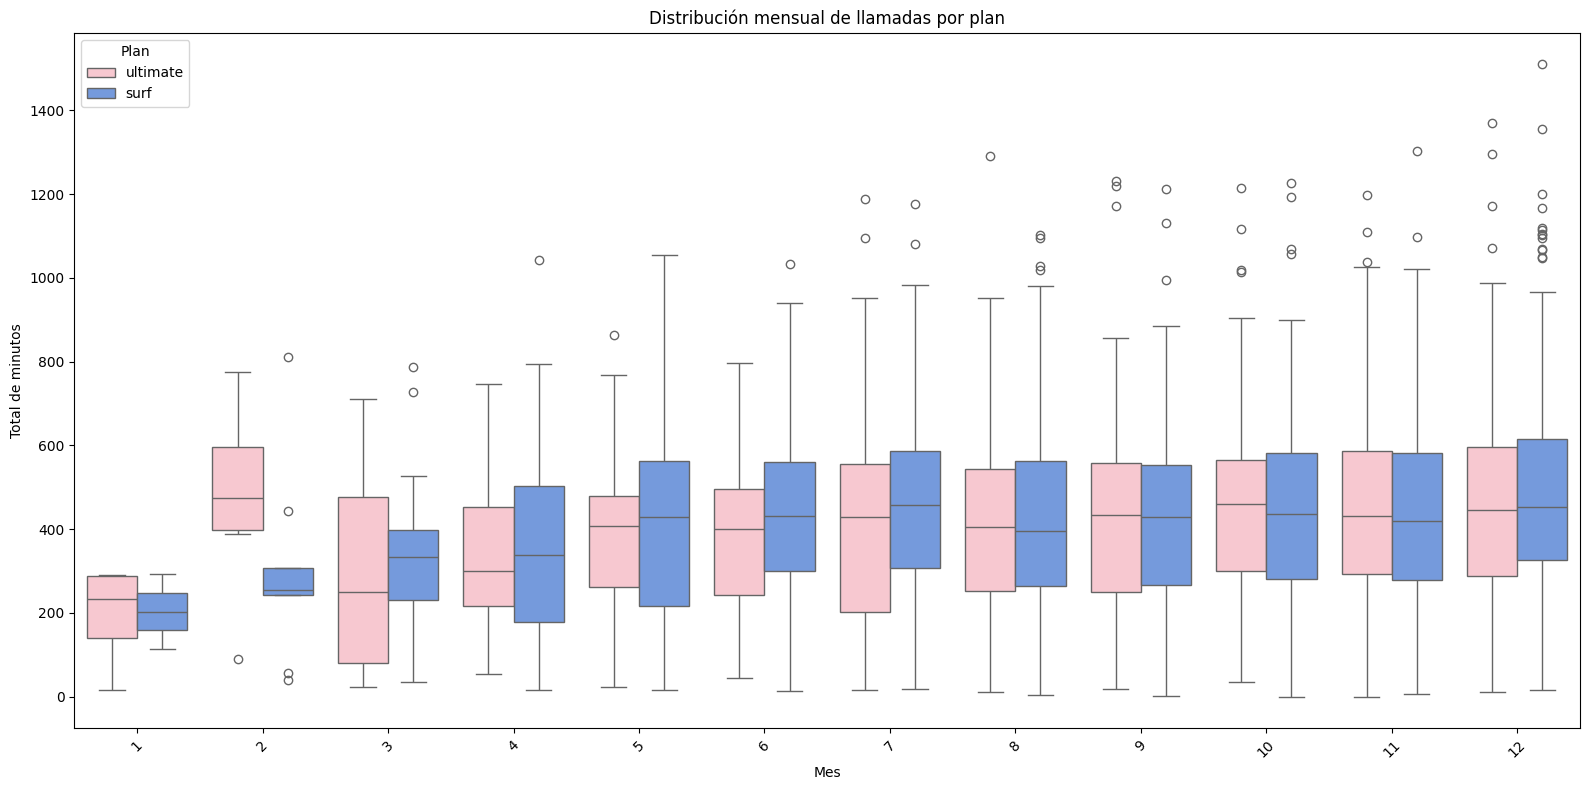

In [35]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas

#Convertir la columna 'month' a tipo string para mejor visualización en el gráfico
final_table['month']=final_table['month'].astype(int) 
#Filtrar los datos para los planes
surf_data=final_table[final_table['plan']=='surf'] 
ultimate_data=final_table[final_table['plan']=='ultimate'] 
#Concatenar los datos en un solo DataFrame 
combined_data=pd.concat([surf_data, ultimate_data]) 
#ordenar por mes en orden ascendente 
combined_data=combined_data.sort_values(by='month')
#convertir de vuelta la columna 'month' a tipo string 
combined_data['month']=combined_data['month'].astype(str) 
# Trazar el diagrama de caja combinado y ordenado por mes 
plt.figure(figsize=(16, 8)) 
sns.boxplot(x='month', 
            y='duration_to_pay', 
            hue='plan', 
            data=combined_data,palette={'surf': 'cornflowerblue', 'ultimate': 'pink'}) 
#configurar etiquetas y título del gráfico 
plt.xlabel('Mes') 
plt.ylabel('Total de minutos') 
plt.title('Distribución mensual de llamadas por plan') 
plt.legend(title='Plan') 
plt.xticks(rotation=45) 
plt.tight_layout() 
plt.show()


[Elabora las conclusiones sobre el comportamiento de los usuarios con respecto a las llamadas. ¿Su comportamiento varía en función del plan?]
Se observa que el comportamiento de los planes a partir del mes 7, es similar. Se vuelve a observar el "pico" en el mes de febrero en el plan ultimate y es probable que al requerir más minutos en ese mes se encuentren dentro de ese plan. 

### Mensajes

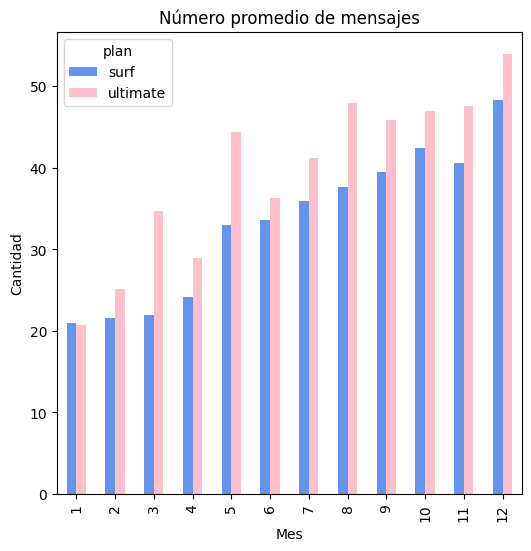

In [36]:
# Comprara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan

average_messages=final_table.groupby(['month', 'plan'])['total_messages'].mean().unstack()

average_messages.plot(
        kind='bar', 
        title='Número promedio de mensajes',
        figsize=[6, 6],
        color=['cornflowerblue','pink'],
        xlabel='Mes',
        ylabel='Cantidad',
       )

plt.show()

[Se observa que el comportamiento en promedio de los planes de acuerdo a mensajes para ultimate, es mayor en 11 de los 12 meses a diferencia de surf. Para ultimate, el mes de diciembre es cuando hay una mayor cantidad de mensajes enviados. En el caso de ultimate es en el mismo mes. Se observa que en promedio, los usuarios no requieren más mensajes en su plan.]

<function matplotlib.pyplot.show(close=None, block=None)>

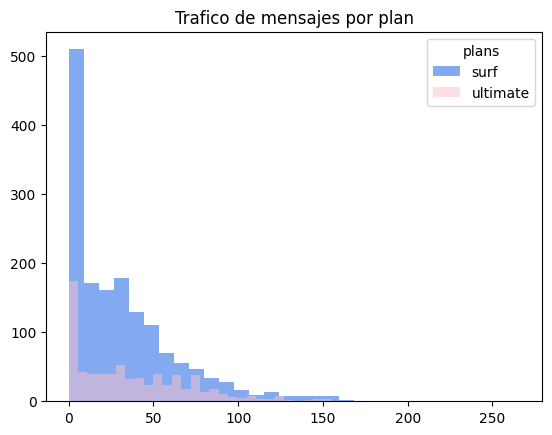

In [37]:
# Compara la cantidad de mensajes enviados por usuarios por plan

messages_traffic=final_table.groupby(['user_id','plan','month'])['total_messages'].sum().reset_index()
plt.figure

plt.hist(messages_traffic[messages_traffic['plan']=='surf']['total_messages'],
         bins=30, 
         alpha=0.8, 
         label='surf',
         color='cornflowerblue')

plt.hist(messages_traffic[messages_traffic['plan']=='ultimate']['total_messages'],
         bins=30, 
         alpha=0.5, 
         label='ultimate',
         color='pink')

plt.title('Trafico de mensajes por plan')
plt.legend(title='plans')
plt.show

[Se observa los usuarios de surf, requieren más mensajes que los usuarios de ultimate.]

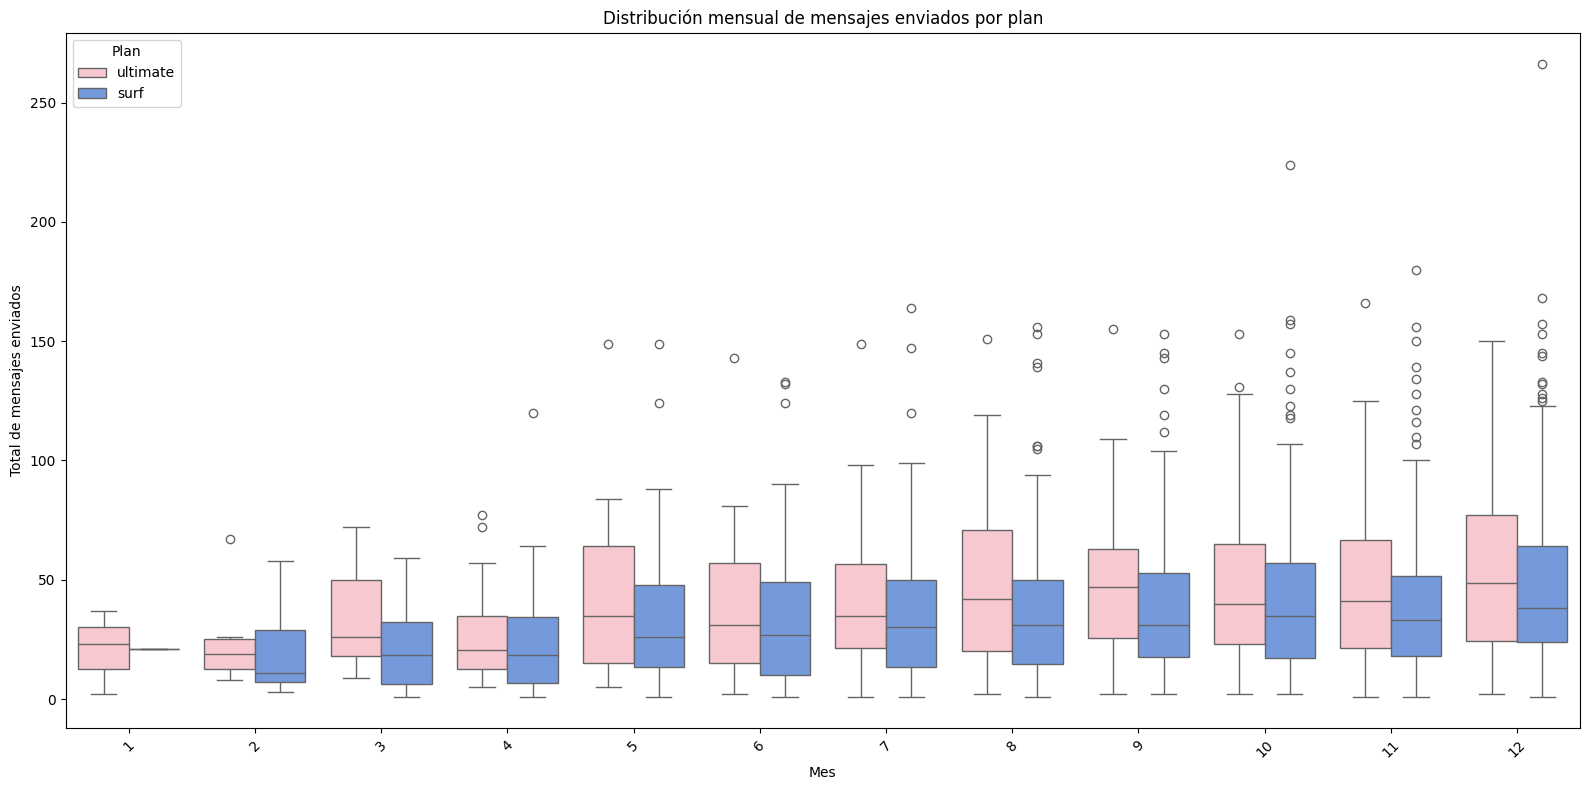

In [38]:
# Traza un diagrama de caja para visualizar la distribución de la cantidad mensual de mensajes.
plt.figure(figsize=(16, 8)) 
sns.boxplot(x='month', y='total_messages', hue='plan', data=combined_data,palette={'surf': 'cornflowerblue', 'ultimate': 'pink'}) 
# Configurar etiquetas y título del gráfico 
plt.xlabel('Mes') 
plt.ylabel('Total de mensajes enviados') 
plt.title('Distribución mensual de mensajes enviados por plan') 
plt.legend(title='Plan') 
plt.xticks(rotation=45) 
plt.tight_layout() 
plt.show()

[Elabora las conclusiones sobre el comportamiento de los usuarios con respecto a los mensajes. ¿Su comportamiento varía en función del plan?
Se puede observar que hay muchos más valores atipicos en su mayoría en el plan de surf. Esto puede ser porque necesitan más mensajes que los que incluye su plan.]

### Internet

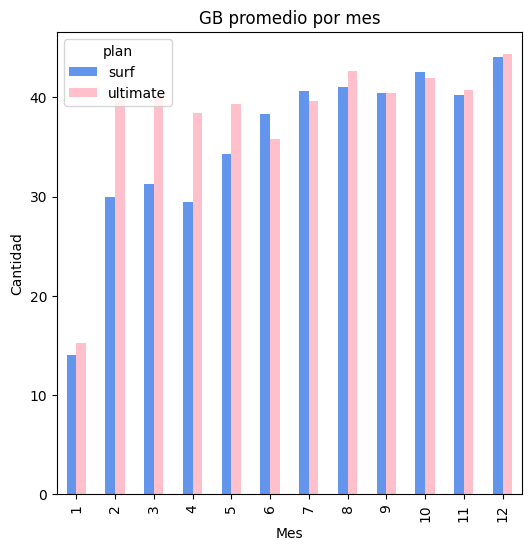

In [39]:
# Comprara el número de GB que tienden a consumir cada mes los usuarios de cada plan

average_gb=final_table.groupby(['month', 'plan'])['gb_to_pay'].mean().unstack()

average_gb.plot(
        kind='bar', 
        title='GB promedio por mes',
        figsize=[6, 6],
        color=['cornflowerblue','pink'],
        xlabel='Mes',
        ylabel='Cantidad',
       )

plt.show()


[Se puede observar que los usuarios de ultimate consumen en promedio aproximadamente 40GB durante todo el año, esto quiere decir aprovechan el internet incluido en su plan. Los usuarios de surf a partir del 5 mes comienzan a tener un uso muy similar al de últimate, esto quiere decir que se les aplicará un costo extra porque su plan incluye 30 gb]

<function matplotlib.pyplot.show(close=None, block=None)>

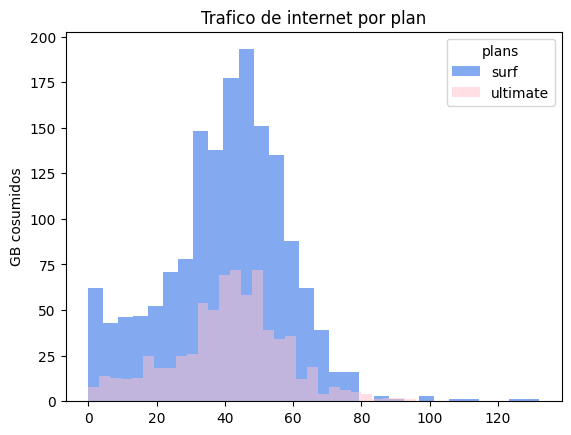

In [40]:
# Compara la cantidad de tráfico de Internet consumido por usuarios por plan

internet_traffic=final_table.groupby(['user_id','plan','month'])['gb_to_pay'].sum().reset_index()
plt.figure

plt.hist(internet_traffic[internet_traffic['plan']=='surf']['gb_to_pay'],
         bins=30, 
         alpha=0.8, 
         label='surf',
         color='cornflowerblue')

plt.hist(internet_traffic[internet_traffic['plan']=='ultimate']['gb_to_pay'],
         bins=30, 
         alpha=0.5, 
         label='ultimate',
         color='pink')

plt.title('Trafico de internet por plan')
plt.ylabel('GB cosumidos')
plt.legend(title='plans')
plt.show

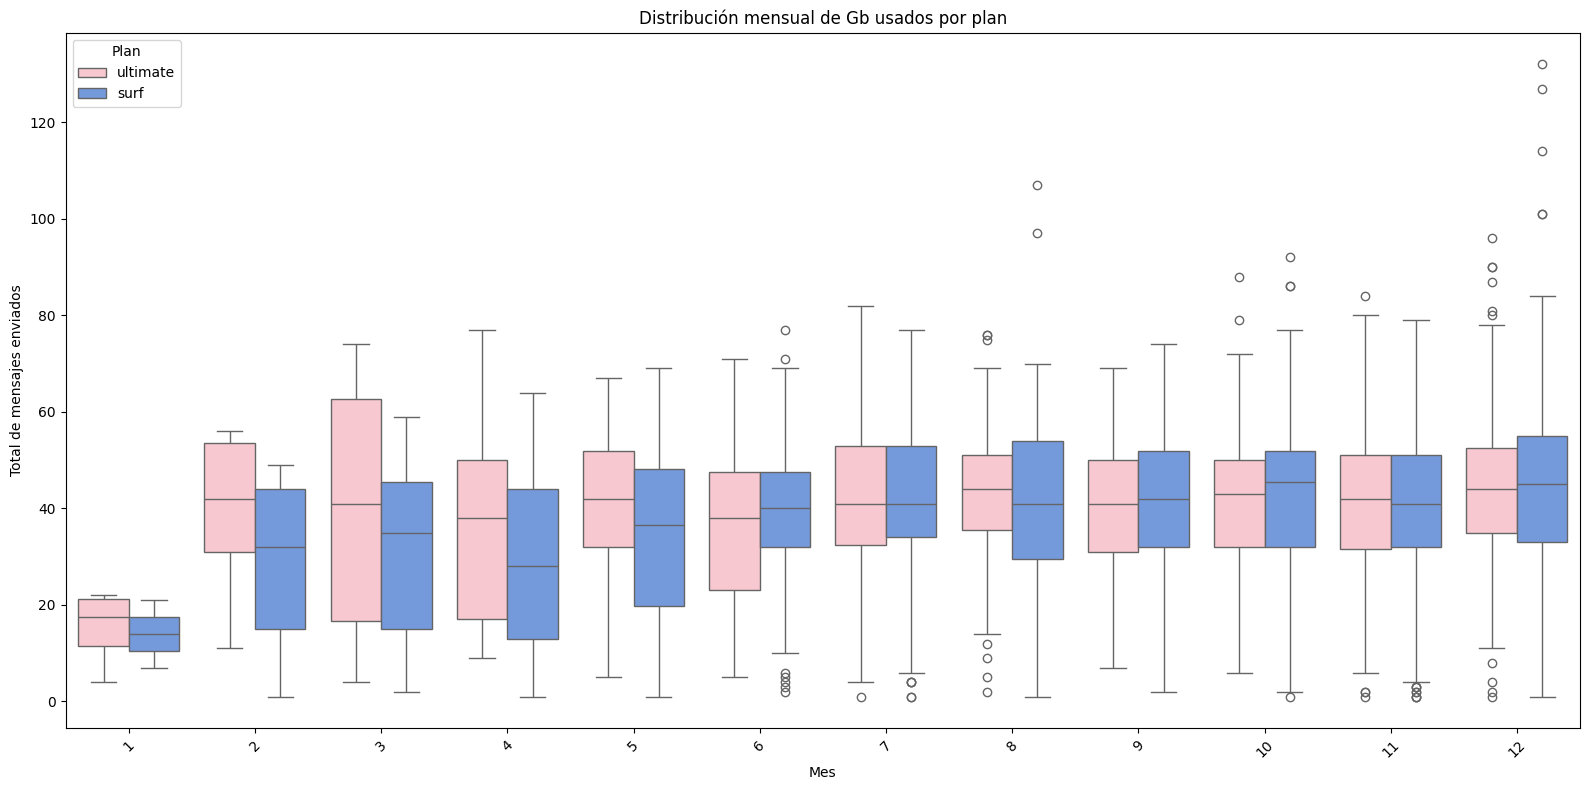

In [41]:
# Traza un diagrama de caja para visualizar la distribución de la cantidad mensual de Gb.
plt.figure(figsize=(16, 8)) 
sns.boxplot(x='month', y='gb_to_pay', hue='plan', data=combined_data, palette={'surf': 'cornflowerblue', 'ultimate': 'pink'}) 
# Configurar etiquetas y título del gráfico 
plt.xlabel('Mes') 
plt.ylabel('Total de mensajes enviados') 
plt.title('Distribución mensual de Gb usados por plan') 
plt.legend(title='Plan') 
plt.xticks(rotation=45) 
plt.tight_layout() 
plt.show()

#final_table.boxplot(column='gb_to_pay', by='month', figsize=(12, 6))

[Elabora las conclusiones sobre cómo los usuarios tienden a consumir el tráfico de Internet. ¿Su comportamiento varía en función del plan?]
El comportamiento varía unicamente en los primeos meses, a partir del sexto mes se observa un comportamiento muy parecido entre ambos planes.

## Ingreso

[Del mismo modo que has estudiado el comportamiento de los usuarios, describe estadísticamente los ingresos de los planes.]

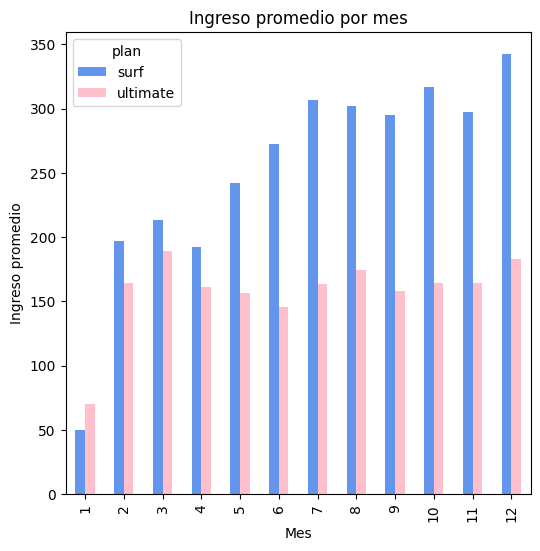

In [42]:
# Comprara el ingreso que tienen cada mes los usuarios de cada plan

average_income=final_table.groupby(['month', 'plan'])['income'].mean().unstack()

average_income.plot(
        kind='bar', 
        title='Ingreso promedio por mes',
        figsize=[6, 6],
        color=['cornflowerblue','pink'],
        xlabel='Mes',
        ylabel='Ingreso promedio',
       )

plt.show()

[Se observa que los usuarios de surf pagan más cada mes que los de ultimate a pesar de que el costo inicial de su plan es menor.]

In [43]:
mean_income=final_table.groupby('month')['income'].mean()
var_income=final_table.groupby('month')['income'].var()

calculo_income=pd.DataFrame({'mean':mean_income, 'var':var_income})
calculo_income

,mean,var
month,,
1,63.333333,466.666667
2,182.731250,14332.208958
3,204.985714,22235.754202
4,182.863380,20793.497211
5,218.553774,23129.735462
6,230.812500,20481.337325
7,259.431111,26203.800032
8,263.156652,28653.697984
9,252.784643,21902.451197


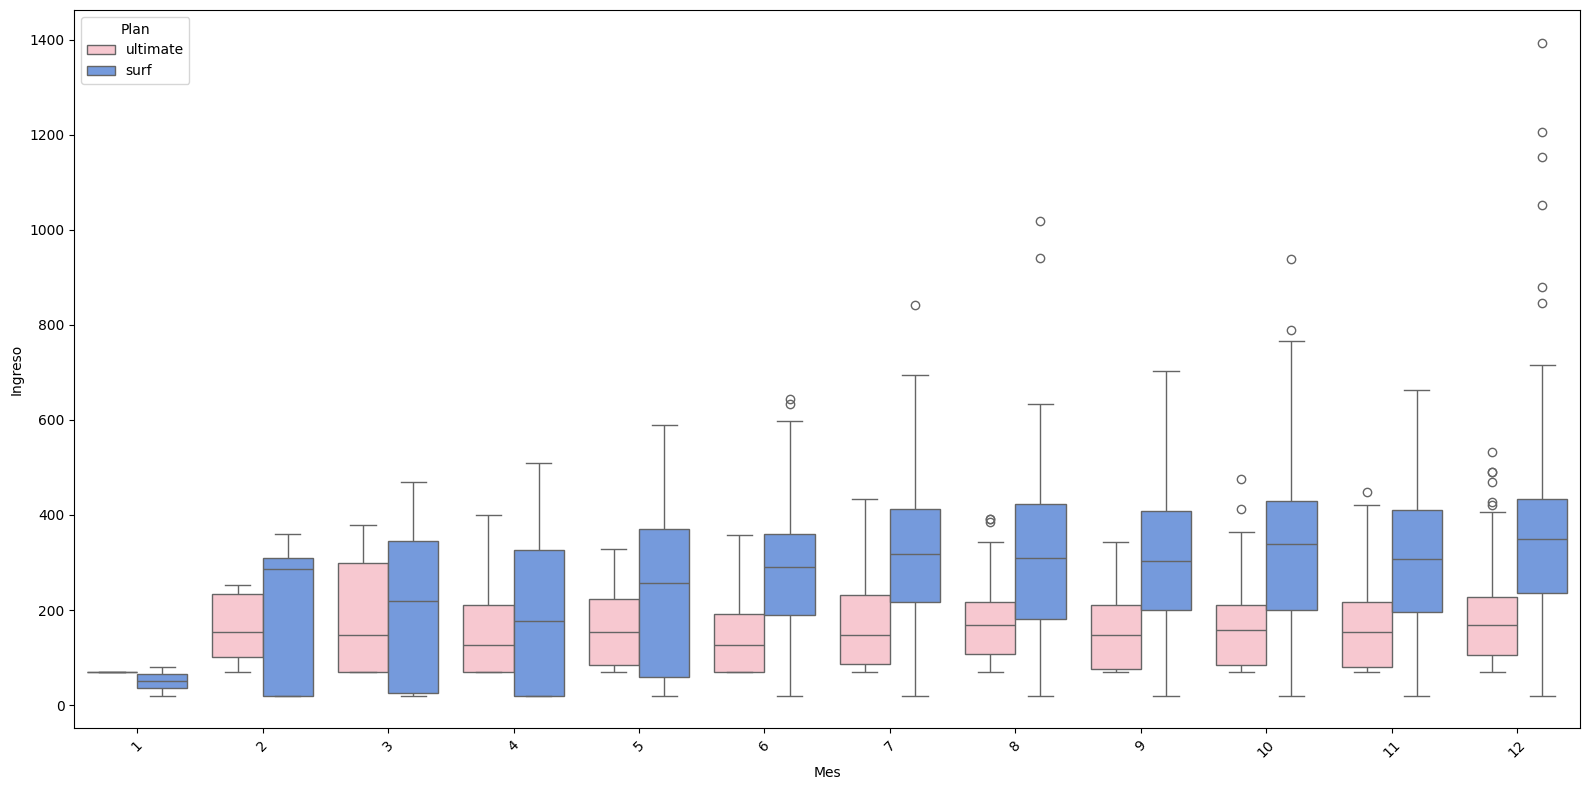

In [44]:
# Traza un diagrama de caja para visualizar la distribución del ingreso mensual por plan.
plt.figure(figsize=(16, 8)) 
sns.boxplot(x='month', y='income', hue='plan', data=combined_data, palette={'surf': 'cornflowerblue', 'ultimate': 'pink'}) 
# Configurar etiquetas y título del gráfico 
plt.xlabel('Mes') 
plt.ylabel('Ingreso') 
plt.title('') 
plt.legend(title='Plan') 
plt.xticks(rotation=45) 
plt.tight_layout() 
plt.show()

[Se confirma que a pesar de contratar el plan menos costoso, los usuarios de surf pagan más que los de ultimate]

## Prueba las hipótesis estadísticas

[Prueba la hipótesis de que son diferentes los ingresos promedio procedentes de los usuarios de los planes de llamada Ultimate y Surf.]

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

In [45]:
# Prueba las hipótesis
#H0= ingresos promedio de los usuarios de los planes ultimate y surf son iguales.
#Ha=Los ingresos promedio de los usuarios de los planes ultimate" y surf son diferentes.

income_ultimate=final_table[final_table['plan']=='ultimate']['income'] 
income_surf=final_table[final_table['plan']=='surf']['income']

alpha=0.05

prueba1=st.ttest_ind(income_ultimate, income_surf, equal_var=False)
print(prueba1)

if prueba1.pvalue<alpha:
    print('Rechazamos la hipótesis nula. Hay evidencia suficiente para decir que los ingresos promedio son diferentes')
else:
    print('No rechazamos la hipótesis nula. No hay evidencia suficiente para decir que los ingresos promedio son diferentes.')

TtestResult(statistic=np.float64(-24.702569306585865), pvalue=np.float64(1.622692541644084e-119), df=np.float64(2268.539927058683))
Rechazamos la hipótesis nula. Hay evidencia suficiente para decir que los ingresos promedio son diferentes


[Prueba la hipótesis de que el ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones.]

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

In [46]:
# Prueba las hipótesis
#H0=el ingreso promedio de los usuarios del área NY-NJ es igual al de los usuarios de otras regiones.
#Ha=el ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones.

region_income=final_table[final_table['region'].isin(['NY-NJ'])]['income'] 
others_regions_income=final_table[~final_table['region'].isin(['NY-NJ'])]['income']

alpha=0.05

prueba2=st.ttest_ind(region_income, others_regions_income, equal_var=False)
print(prueba2)

if prueba2.pvalue<alpha:
    print('Rechazamos la hipótesis nula. Hay evidencia suficiente para decir que los ingresos promedio son diferentes')
else:
    print('No rechazamos la hipótesis nula. No hay evidencia suficiente para decir que los ingresos promedio son diferentes ')

TtestResult(statistic=np.float64(2.705076145182693), pvalue=np.float64(0.007038034536250181), df=np.float64(556.6252661348501))
Rechazamos la hipótesis nula. Hay evidencia suficiente para decir que los ingresos promedio son diferentes


## Conclusión general

Con la realización de este proyecto, se pudo observar el comportamiento de los usuarios de acuerdo a su consumo de minutos, mensajes e internet de dos planes en específico. Se pudo observar que a pesar de que los usuarios de surf que contratan el plan que cuesta 20 dólares al fin de cada mes terminan pagando más que los usuarios que contratan el plan "más caro" ya que el plan surf incluye muy poca cantidad de minutos, mensajes e internet y probablemente al momento de elegir el plan, no se considere gastar tanto en excedente de servicios. En este caso se puede observar que es más conveniente contratar el plan ultimate ya que los servicios que incluye son mayores.
Por otro lado, al contratar el plan surf, las tarifas de excedentes en cuestión de llamadas y mensajes es 3 veces mayor que en el plan ultimate, en el caso de internet no es mucha la diferencia pero al final del mes, el dinero que se acumula es muy considerable.

